In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/networktrafficdata/networktrafficdata.csv


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
import seaborn as sns
from prettytable import PrettyTable
from scipy.stats import multivariate_normal
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from joblib import dump
from joblib import load
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from sklearn.metrics import log_loss, roc_auc_score

2024-05-30 21:18:37.493146: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-30 21:18:37.493292: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-30 21:18:37.659934: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
#datasetimizi pandasa okutuyoz.
df = pd.read_csv("/kaggle/input/networktrafficdata/networktrafficdata.csv", encoding='ISO-8859-1')
df

,No.,Time,Source,Destination,Protocol,Length,Time since previous frame in this TCP stream,Source Port,Destination Port,Sequence Number,Acknowledgment Number,Time to Live,Arrival Time,S7 Communication,Data length,Function,Length.1,Byte Address,Info,label
0,1,0.000000,192.168.0.2,192.168.0.1,COTP,145,0.000000,56667.0,102.0,1.0,1.0,128.0,"Jan 22, 2024 16:20:41.916356000 China Standard...",NaN,NaN,NaN,NaN,NaN,DT TPDU (0) EOT,Normal
1,2,0.000499,192.168.0.2,192.168.0.1,COTP,61,0.000499,56667.0,102.0,92.0,55.0,128.0,"Jan 22, 2024 16:20:41.916855000 China Standard...",NaN,NaN,NaN,NaN,NaN,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal
2,3,0.000710,192.168.0.2,192.168.0.1,COTP,61,0.000211,56667.0,102.0,99.0,317.0,128.0,"Jan 22, 2024 16:20:41.917066000 China Standard...",NaN,NaN,NaN,NaN,NaN,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal
3,4,0.077318,192.168.0.2,192.168.0.1,COTP,61,0.000000,56665.0,102.0,1.0,1.0,128.0,"Jan 22, 2024 16:20:41.993674000 China Standard...",NaN,NaN,NaN,NaN,NaN,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal
4,5,0.316463,192.168.0.2,192.168.0.1,COTP,145,0.315753,56667.0,102.0,106.0,317.0,128.0,"Jan 22, 2024 16:20:42.232819000 China Standard...",NaN,NaN,NaN,NaN,NaN,DT TPDU (0) EOT,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3920,3921,187.656357,192.168.0.2,192.168.0.1,COTP,61,0.000457,56667.0,102.0,63330.0,191321.0,128.0,"Jan 22, 2024 16:23:49.572713000 China Standard...",NaN,NaN,NaN,NaN,NaN,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal
3921,3922,187.656512,192.168.0.2,192.168.0.1,COTP,61,0.000155,56667.0,102.0,63337.0,191583.0,128.0,"Jan 22, 2024 16:23:49.572868000 China Standard...",NaN,NaN,NaN,NaN,NaN,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal
3922,3923,187.658886,PcsCompu_53:3b:4f,LLDP_Multicast,LLDP,152,NaN,NaN,NaN,NaN,NaN,NaN,"Jan 22, 2024 16:23:49.575242000 China Standard...",NaN,NaN,NaN,NaN,NaN,LA/windows10 LA/port-001 20 SysN=WINDOWS10 Sys...,Abnormal
3923,3924,187.842001,192.168.0.13,192.168.0.1,TCP,60,32.809577,43430.0,102.0,1.0,1.0,64.0,"Jan 22, 2024 16:23:49.758357000 China Standard...",NaN,NaN,NaN,NaN,NaN,[TCP Dup ACK 373#5] 43430 > 102 [ACK] Seq=1 ...,Abnormal


In [4]:
#Nan donen bos verileri tespit ediyoruz.

missing_values = df.isna()  # or df.isnull()

missing_count = missing_values.sum()

print(missing_count)

No.                                                0
Time                                               0
Source                                             0
Destination                                        0
Protocol                                           0
Length                                             0
Time since previous frame in this TCP stream     774
Source Port                                      774
Destination Port                                 774
Sequence Number                                  774
Acknowledgment Number                            774
Time to Live                                     207
Arrival Time                                       0
S7 Communication                                3771
Data length                                     3771
Function                                        3771
Length.1                                        3864
Byte Address                                    3772
Info                                          

In [5]:
#bos verileri 0 ile dolduruyoruz.
df.fillna(0, inplace=True)

In [6]:
missing_values = df.isna()  # or df.isnull()

missing_count = missing_values.sum()

print(missing_count)

No.                                             0
Time                                            0
Source                                          0
Destination                                     0
Protocol                                        0
Length                                          0
Time since previous frame in this TCP stream    0
Source Port                                     0
Destination Port                                0
Sequence Number                                 0
Acknowledgment Number                           0
Time to Live                                    0
Arrival Time                                    0
S7 Communication                                0
Data length                                     0
Function                                        0
Length.1                                        0
Byte Address                                    0
Info                                            0
label                                           0


In [7]:
df.columns

Index(['No.', 'Time', 'Source', 'Destination', 'Protocol', 'Length',
       'Time since previous frame in this TCP stream', 'Source Port',
       'Destination Port', 'Sequence Number', 'Acknowledgment Number',
       'Time to Live', 'Arrival Time', 'S7 Communication', 'Data length',
       'Function', 'Length.1', 'Byte Address', 'Info', 'label'],
      dtype='object')

In [8]:
df.rename(columns={'label': 'Label'}, inplace=True)

In [9]:
# Drop non-numeric columns and convert IP columns to numerical form (using dummy variables)
numeric_columns = ['Source', 'Destination','Protocol','Length',
       'Source Port',
       'Destination Port', 
       'Time to Live', 'Byte Address']

def preprocessing(df,numeric_columns):
    data = df.copy()
    # Replace NaN values with 0
    data.fillna(0, inplace=True)
    
        # Assuming you have a DataFrame named 'your_dataframe' with a column named 'old_column_name'
    # Rename 'old_column_name' to 'new_column_name'
    

    '''
      # Replace 0 values in 'Function' column with 'Unknown'
    data['Function'] = data['Function'].replace(0, 'Unknown')

    # Label encoding for specific string columns
    label_encoder = LabelEncoder()

    # Only encode string values while keeping 0s intact
    mask = data['Function'].apply(lambda x: isinstance(x, str))
    data.loc[mask, 'Function'] = label_encoder.fit_transform(data.loc[mask, 'Function'])
    data['Function'] = data['Function'].astype(int)
    '''
    # Convert labels to numeric form using label encoding
    label_encoder = LabelEncoder()
    
   
    
    #ip adreslerini makinenin anlayacagi sekilde 1 ve 0'a ceviriyoruz 0a atadigimiz ipler guvenilir normal
    data['Source'] = data['Source'].apply(lambda x: 0 if x in ['192.168.0.1', '192.168.0.2'] else 1)
    data['Destination'] = data['Destination'].apply(lambda x: 0 if x in ['192.168.0.1', '192.168.0.2'] else 1)
    
    data['Byte Address'] = data['Byte Address'].apply(lambda x: 0 if x in [int('0')] else 1)
    
    
    # Assuming 'data' is your DataFrame and 'Protocol' column needs encoding
    data['Protocol'] = data['Protocol'].fillna('Unknown')  # Fill NaN values with 'Unknown'

    known_protocols = ['ARP', 'BROWSER', 'COTP', 'ICMPv6', 'IGMPv3', 'IPv4', 'LLDP', 'LLMNR',
                       'MDNS', 'NBNS', 'NTP', 'OpcUa', 'S7COMM', 'SSDP', 'TCP','TPKT','ICMP']

    # Create a label encoder
    label_encoder = LabelEncoder()

    # Fit and transform the 'Protocol' column
    data['Protocol'] = label_encoder.fit_transform(data['Protocol'])

    # Handling unknown protocols
    if 'Unknown' not in label_encoder.classes_:
        # Assign a unique value for 'Unknown' protocol
        unknown_label = max(data['Protocol']) + 1
        print(f"Assigning 'Unknown' protocol label as: {unknown_label}")
        data.loc[data['Protocol'] == 'Unknown', 'Protocol'] = unknown_label

    # Define a function to encode protocols or assign a default value for unknown ones
    def encode_protocol(protocol):
        if protocol in known_protocols:
            return label_encoder.transform([protocol])[0]
        else:
            return unknown_label  # Assign the value you previously determined for unknown protocols

    # Apply the encode_protocol function to the 'Protocol' column
    data['Protocol'] = data['Protocol'].apply(encode_protocol)
    
   
    # Fit and transform the 'Label' column
    data['Label'] = label_encoder.fit_transform(data['Label'])

    # Invert the labels
    data['Label'] = 1 - data['Label']
    y = data['Label']
    # Drop non-numeric columns and convert IP columns to numerical form (using dummy variables)
    data= data[numeric_columns]
    dataframe = data.copy()
    # Convert the list to a NumPy array
    labels = np.array(y)
    #get values from dataset
    raw_data = data.values
        # Convert the data to numeric type
   
    # Get values not last column which is target column
    data = raw_data[:, 0:-1]
    #normalization of data
    data = ((data - data.min()) / (data.max() - data.min()))*2
    return dataframe,data,labels

In [10]:
dataframe,data,labels = preprocessing(df,numeric_columns)
dataframe

Assigning 'Unknown' protocol label as: 13


,Source,Destination,Protocol,Length,Source Port,Destination Port,Time to Live,Byte Address
0,0,0,13,145,56667.0,102.0,128.0,0
1,0,0,13,61,56667.0,102.0,128.0,0
2,0,0,13,61,56667.0,102.0,128.0,0
3,0,0,13,61,56665.0,102.0,128.0,0
4,0,0,13,145,56667.0,102.0,128.0,0
...,...,...,...,...,...,...,...,...
3920,0,0,13,61,56667.0,102.0,128.0,0
3921,0,0,13,61,56667.0,102.0,128.0,0
3922,1,1,13,152,0.0,0.0,0.0,0
3923,1,0,13,60,43430.0,102.0,64.0,0


Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6627 - loss: 0.5477 - val_accuracy: 0.8591 - val_loss: 0.4008
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8452 - loss: 0.4389 - val_accuracy: 0.8591 - val_loss: 0.3730
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8416 - loss: 0.4093 - val_accuracy: 0.8591 - val_loss: 0.3388
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8428 - loss: 0.3725 - val_accuracy: 0.8591 - val_loss: 0.3097
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8516 - loss: 0.3591 - val_accuracy: 0.8879 - val_loss: 0.2884
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8701 - loss: 0.3256 - val_accuracy: 0.8913 - val_loss: 0.2715
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8799 - loss: 0.3181 - val_accuracy: 0.8930 - val_loss: 0.2610
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8911 - loss: 0.2949 - val_accuracy: 0.8930 - val_loss:

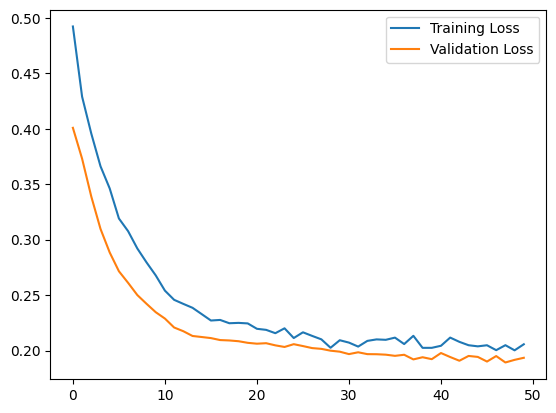

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9230 - loss: 0.2068 


In [11]:
def neural_networks(data, labels):
    X = data
    y = labels

    # Split data into training, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
   

    #undersample = RandomUnderSampler(random_state=42)
    #X_train, y_train = undersample.fit_resample(X_train, y_train)
    # Apply SMOTE for oversampling on training data
    #smote = SMOTE(random_state=42)
    #X_train, y_train = smote.fit_resample(X_train, y_train)

    # Build a simple neural network model
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X.shape[1],)),  # Replace num_features with the actual number of features
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))
    #plot training loss and validation loss
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.legend()
    # Save the plot
    plt.savefig('loss_plot.png')  # Change the file extension and name as needed
    plt.show()
    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    # Evaluate the model on the validation set
    nn_val_loss, nn_val_accuracy = model.evaluate(X_val, y_val)
    y_pred_binary = (y_pred > 0.5).astype(int)
    nn_predictions = y_pred_binary
    # Print evaluation metrics or use an existing function
    #print_stats(y_pred_binary, y_test)
    # Assuming your neural network model is defined in the neural_networks function
    # Train the neural network model and save it
   
    model.save("neural_network_model.h5")

    return nn_predictions,nn_val_loss, nn_val_accuracy,y_pred


# Example usage
nn_predictions,nn_val_loss, nn_val_accuracy,y_pred = neural_networks(data, labels)

In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


def machine_learning_data(data, labels,nn_predictions,nn_val_loss, nn_val_accuracy,y_pred):
    X = data
    y = labels

    # Split data into training, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    
    #undersample = RandomUnderSampler(random_state=42)
    #X_train, y_train = undersample.fit_resample(X_train, y_train)
    ## Apply SMOTE for oversampling on training data
    #smote = SMOTE(random_state=42)
    #X_train, y_train = smote.fit_resample(X_train, y_train)
    
    # Calculate and print the sizes of the datasets
    size_X = len(X)
    size_X_train = len(X_train)
    size_X_val = len(X_val)
    size_X_test = len(X_test)

    print(f"Size of the original dataset (X): {size_X}")
    print(f"Size of the training set (X_train): {size_X_train}")
    print(f"Size of the validation set (X_val): {size_X_val}")
    print(f"Size of the test set (X_test): {size_X_test}")
    
    # Initialize machine learning models with adjusted training data
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)
    svm_model = SVC(C=1.0, kernel='rbf', gamma='scale')
    gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
    lr_model = LogisticRegression(C=1.0, solver='lbfgs')
    xgboost_model = XGBClassifier(objective='binary:logistic')

    # Train machine learning models with resampled data
    rf_model.fit(X_train, y_train)
    svm_model.fit(X_train, y_train)
    gb_model.fit(X_train, y_train)
    lr_model.fit(X_train, y_train)
    xgboost_model.fit(X_train, y_train)
    # ... (rest of your code remains the same)
            # Save each scikit-learn model
    dump(rf_model, 'random_forest_model.joblib')
    dump(svm_model, 'svm_model.joblib')
    dump(gb_model, 'gradient_boosting_model.joblib')
    dump(lr_model, 'logistic_regression_model.joblib')
    dump(xgboost_model, 'xgboost_model.joblib')
    
    # Predictions for machine learning models on validation and test sets
    rf_val_predictions = rf_model.predict(X_val)
    svm_val_predictions = svm_model.predict(X_val)
    gb_val_predictions = gb_model.predict(X_val)
    lr_val_predictions = lr_model.predict(X_val)
    xgboost_val_predictions = xgboost_model.predict(X_val)
    
    # Evaluate metrics for machine learning models on validation set
    rf_val_accuracy = accuracy_score(y_val, rf_val_predictions)
    svm_val_accuracy = accuracy_score(y_val, svm_val_predictions)
    gb_val_accuracy = accuracy_score(y_val, gb_val_predictions)
    lr_val_accuracy = accuracy_score(y_val, lr_val_predictions)
    xgboost_val_accuracy = accuracy_score(y_val, xgboost_val_predictions)
    
    # Predictions for machine learning models on test set
    rf_predictions = rf_model.predict(X_test)
    svm_predictions = svm_model.predict(X_test)
    gb_predictions = gb_model.predict(X_test)
    lr_predictions = lr_model.predict(X_test)
    xgboost_predictions = xgboost_model.predict(X_test)
    
    # Evaluate metrics for machine learning models on test set
    rf_accuracy = accuracy_score(y_test, rf_predictions)
    svm_accuracy = accuracy_score(y_test, svm_predictions)
    gb_accuracy = accuracy_score(y_test, gb_predictions)
    lr_accuracy = accuracy_score(y_test, lr_predictions)
    xgboost_accuracy = accuracy_score(y_test, xgboost_predictions)

    # Now, include the neural network model
    # Assuming neural_networks function is already defined and returns y_pred_binary
    #nn_predictions,nn_val_loss, nn_val_accuracy,y_pred = neural_networks(data, labels)
    
  
    # Evaluate metrics for the neural network model
    nn_accuracy = accuracy_score(y_test, nn_predictions)
    nn_precision = precision_score(y_test, nn_predictions)
    nn_recall = recall_score(y_test, nn_predictions)
    nn_f1 = f1_score(y_test, nn_predictions)
    nn_roc_auc = roc_auc_score(y_test, nn_predictions)
    
    
    # Print results for machine learning models
    print("\nMachine Learning Model Accuracy Scores on Validation Set:")
    print("-------------------------------------")
    print("-------------------------------------")
    print(f"Random Forest: {rf_val_accuracy:.5f}")
    print(f"SVM: {svm_val_accuracy:.5f}")
    print(f"Gradient Boosting: {gb_val_accuracy:.5f}")
    print(f"Logistic Regression: {lr_val_accuracy:.5f}")
    print(f"XGBoost: {xgboost_val_accuracy:.5f}")
    print(f"Neural Network (Validation): {nn_val_accuracy:.5f}\n")
    print("-------------------------------------")
    print("-------------------------------------")

    # Print results for machine learning models
    print("\nMachine Learning Model Accuracy Scores on Test Set:")
    print("-------------------------------------")
    print("-------------------------------------\n")
    print(f"Random Forest: {rf_accuracy:.5f}")
    print(f"SVM: {svm_accuracy:.5f}")
    print(f"Gradient Boosting: {gb_accuracy:.5f}")
    print(f"Logistic Regression: {lr_accuracy:.5f}")
    print(f"XGBoost: {xgboost_accuracy:.5f}")
    print(f"Neural Network: {nn_accuracy:.5f}\n")
    print("-------------------------------------")
    print("-------------------------------------\n")


    '''
    # Print results for the neural network model
    print("Neural Network Model Metrics:")
    print(f"Accuracy: {nn_accuracy}")
    print(f"Precision: {nn_precision}")
    print(f"Recall: {nn_recall}")
    print(f"F1-score: {nn_f1}")
    print(f"ROC AUC: {nn_roc_auc}")'''
    return X_train, X_temp, y_train, y_temp,X_val, X_test, y_val, y_test,rf_val_accuracy,svm_val_accuracy,gb_val_accuracy,lr_val_accuracy,xgboost_val_accuracy,rf_val_predictions,svm_val_predictions,gb_val_predictions,lr_val_predictions,xgboost_val_predictions,rf_predictions,svm_predictions,gb_predictions,lr_predictions,xgboost_predictions,nn_predictions,y_test,rf_accuracy,svm_accuracy,gb_accuracy,lr_accuracy,xgboost_accuracy,nn_accuracy
# Example usage
# machine_learning_data(data, labels)
#model score comperation
X_train, X_temp, y_train, y_temp,X_val, X_test, y_val, y_test,rf_val_accuracy,svm_val_accuracy,gb_val_accuracy,lr_val_accuracy,xgboost_val_accuracy,rf_val_predictions,svm_val_predictions,gb_val_predictions,lr_val_predictions,xgboost_val_predictions,rf_predictions,svm_predictions,gb_predictions,lr_predictions,xgboost_predictions,nn_predictions,y_test,rf_accuracy,svm_accuracy,gb_accuracy,lr_accuracy,xgboost_accuracy,nn_accuracy = machine_learning_data(data, labels,nn_predictions,nn_val_loss, nn_val_accuracy,y_pred)

Size of the original dataset (X): 3925
Size of the training set (X_train): 2747
Size of the validation set (X_val): 589
Size of the test set (X_test): 589

Machine Learning Model Accuracy Scores on Validation Set:
-------------------------------------
-------------------------------------
Random Forest: 1.00000
SVM: 0.92869
Gradient Boosting: 1.00000
Logistic Regression: 0.85908
XGBoost: 1.00000
Neural Network (Validation): 0.92869

-------------------------------------
-------------------------------------

Machine Learning Model Accuracy Scores on Test Set:
-------------------------------------
-------------------------------------

Random Forest: 1.00000
SVM: 0.95076
Gradient Boosting: 1.00000
Logistic Regression: 0.87606
XGBoost: 1.00000
Neural Network: 0.95076

-------------------------------------
-------------------------------------



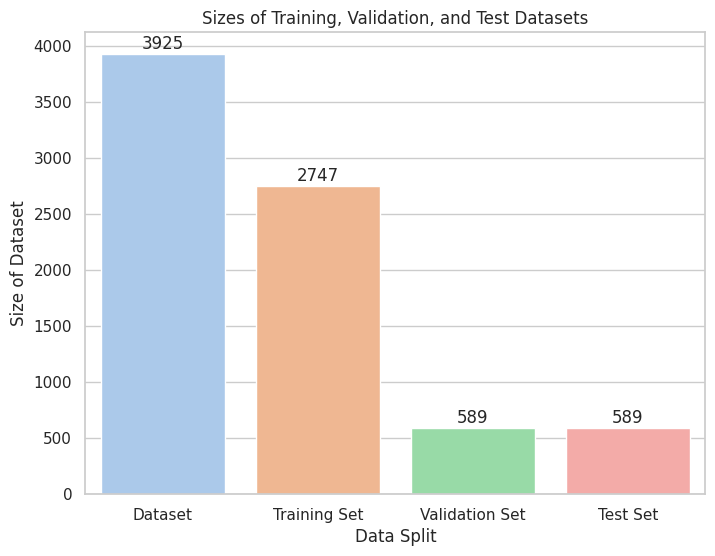

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

#slayta koymak icin verilerin parcalanmasini gorsellestirme amacli.

size_X = len(data)
train_length = len(X_train)
val_length = len(X_val)
test_length = len(X_test)

labels = ['Dataset','Training Set', 'Validation Set', 'Test Set']
sizes = [size_X,train_length, val_length, test_length]

sns.set(style='whitegrid', palette='pastel')

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=labels, y=sizes)
plt.xlabel('Data Split')
plt.ylabel('Size of Dataset')
plt.title('Sizes of Training, Validation, and Test Datasets')

for i, size in enumerate(sizes):
    ax.text(i, size + 10, str(size), ha='center', va='bottom', fontsize=12)
output_path = '/kaggle/working/Sizes_of_Train_Val_Test_Datasets.png'
plt.savefig(output_path, bbox_inches='tight')
plt.show()


In [14]:
def results_machine_learning(y_test,rf_predictions,svm_predictions,gb_predictions,lr_predictions,xgboost_predictions):
    
    #detayli karsilastirmak icin.
    # Calculate evaluation metrics
    rf_precision = precision_score(y_test, rf_predictions)
    rf_recall = recall_score(y_test, rf_predictions)
    rf_f1 = f1_score(y_test, rf_predictions)
    rf_roc_auc = roc_auc_score(y_test, rf_predictions)

    svm_precision = precision_score(y_test, svm_predictions)
    svm_recall = recall_score(y_test, svm_predictions)
    svm_f1 = f1_score(y_test, svm_predictions)
    svm_roc_auc = roc_auc_score(y_test, svm_predictions)

    gb_precision = precision_score(y_test, gb_predictions)
    gb_recall = recall_score(y_test, gb_predictions)
    gb_f1 = f1_score(y_test, gb_predictions)
    gb_roc_auc = roc_auc_score(y_test, gb_predictions)

    lr_precision = precision_score(y_test, lr_predictions)
    lr_recall = recall_score(y_test, lr_predictions)
    lr_f1 = f1_score(y_test, lr_predictions)
    lr_roc_auc = roc_auc_score(y_test, lr_predictions)
    
    xgboost_precision = precision_score(y_test, xgboost_predictions)
    xgboost_recall = recall_score(y_test, xgboost_predictions)
    xgboost_f1 = f1_score(y_test, xgboost_predictions)
    xgboost_roc_auc = roc_auc_score(y_test, xgboost_predictions)
    
    # Evaluate metrics for the neural network model
    nn_accuracy = accuracy_score(y_test, nn_predictions)
    nn_precision = precision_score(y_test, nn_predictions)
    nn_recall = recall_score(y_test, nn_predictions)
    nn_f1 = f1_score(y_test, nn_predictions)
    nn_roc_auc = roc_auc_score(y_test, nn_predictions)
        # Create a dictionary to store the metrics
    results = {
        'Random Forest': {
            'Precision': rf_precision,
            'Recall': rf_recall,
            'F1-score': rf_f1,
            'ROC AUC': rf_roc_auc
        },
        'SVM': {
            'Precision': svm_precision,
            'Recall': svm_recall,
            'F1-score': svm_f1,
            'ROC AUC': svm_roc_auc
        },
        'Gradient Boosting': {
            'Precision': gb_precision,
            'Recall': gb_recall,
            'F1-score': gb_f1,
            'ROC AUC': gb_roc_auc
        },
        'Logistic Regression': {
            'Precision': lr_precision,
            'Recall': lr_recall,
            'F1-score': lr_f1,
            'ROC AUC': lr_roc_auc
        },
        'XGBoost': {
            'Precision': xgboost_precision,
            'Recall': xgboost_recall,
            'F1-score': xgboost_f1,
            'ROC AUC': xgboost_roc_auc
        },
        'Neural Network': {
            'Precision': nn_precision,
            'Recall': nn_recall,
            'F1-score': nn_f1,
            'ROC AUC': nn_roc_auc
        }
    }

    # Print the metrics for each model
    print("Random Forest Metrics:")
    print(f"Accuracy: {rf_accuracy}")
    print(f"Precision: {rf_precision}")
    print(f"Recall: {rf_recall}")
    print(f"F1-score: {rf_f1}")
    print(f"ROC AUC: {rf_roc_auc}")

    print("\nSVM Metrics:")
    print(f"Accuracy: {svm_accuracy}")
    print(f"Precision: {svm_precision}")
    print(f"Recall: {svm_recall}")
    print(f"F1-score: {svm_f1}")
    print(f"ROC AUC: {svm_roc_auc}")

    print("\nGradient Boosting Metrics:")
    print(f"Accuracy: {gb_accuracy}")
    print(f"Precision: {gb_precision}")
    print(f"Recall: {gb_recall}")
    print(f"F1-score: {gb_f1}")
    print(f"ROC AUC: {gb_roc_auc}")

    print("\nLogistic Regression Metrics:")
    print(f"Accuracy: {lr_accuracy}")
    print(f"Precision: {lr_precision}")
    print(f"Recall: {lr_recall}")
    print(f"F1-score: {lr_f1}")
    print(f"ROC AUC: {lr_roc_auc}")
    
    print("\nXGBoost Metrics:")
    print(f"Accuracy: {xgboost_accuracy}")
    print(f"Precision: {xgboost_precision}")
    print(f"Recall: {xgboost_recall}")
    print(f"F1-score: {xgboost_f1}")
    print(f"ROC AUC: {xgboost_roc_auc}")
    
    
    print("\nNeural Network Model Metrics:")
    print(f"Accuracy: {nn_accuracy}")
    print(f"Precision: {nn_precision}")
    print(f"Recall: {nn_recall}")
    print(f"F1-score: {nn_f1}")
    print(f"ROC AUC: {nn_roc_auc}")
    return results,rf_precision,rf_recall,rf_f1,rf_roc_auc,svm_precision,svm_recall,svm_f1,svm_roc_auc,gb_precision,gb_recall,gb_f1,gb_roc_auc,lr_precision,lr_recall,lr_f1,lr_roc_auc,xgboost_precision,xgboost_recall,xgboost_f1,xgboost_roc_auc,nn_accuracy,nn_precision,nn_recall,nn_f1,nn_roc_auc 
results,rf_precision,rf_recall,rf_f1,rf_roc_auc,svm_precision,svm_recall,svm_f1,svm_roc_auc,gb_precision,gb_recall,gb_f1,gb_roc_auc,lr_precision,lr_recall,lr_f1,lr_roc_auc,xgboost_precision,xgboost_recall,xgboost_f1,xgboost_roc_auc,nn_accuracy,nn_precision,nn_recall,nn_f1,nn_roc_auc  =results_machine_learning(y_test,rf_predictions,svm_predictions,gb_predictions,lr_predictions,xgboost_predictions)

Random Forest Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC: 1.0

SVM Metrics:
Accuracy: 0.9507640067911715
Precision: 0.8738317757009346
Recall: 0.9894179894179894
F1-score: 0.9280397022332507
ROC AUC: 0.9609589947089946

Gradient Boosting Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC: 1.0

Logistic Regression Metrics:
Accuracy: 0.8760611205432938
Precision: 0.8411764705882353
Recall: 0.7566137566137566
F1-score: 0.7966573816155988
ROC AUC: 0.8445568783068784

XGBoost Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC: 1.0

Neural Network Model Metrics:
Accuracy: 0.9507640067911715
Precision: 0.8738317757009346
Recall: 0.9894179894179894
F1-score: 0.9280397022332507
ROC AUC: 0.9609589947089946


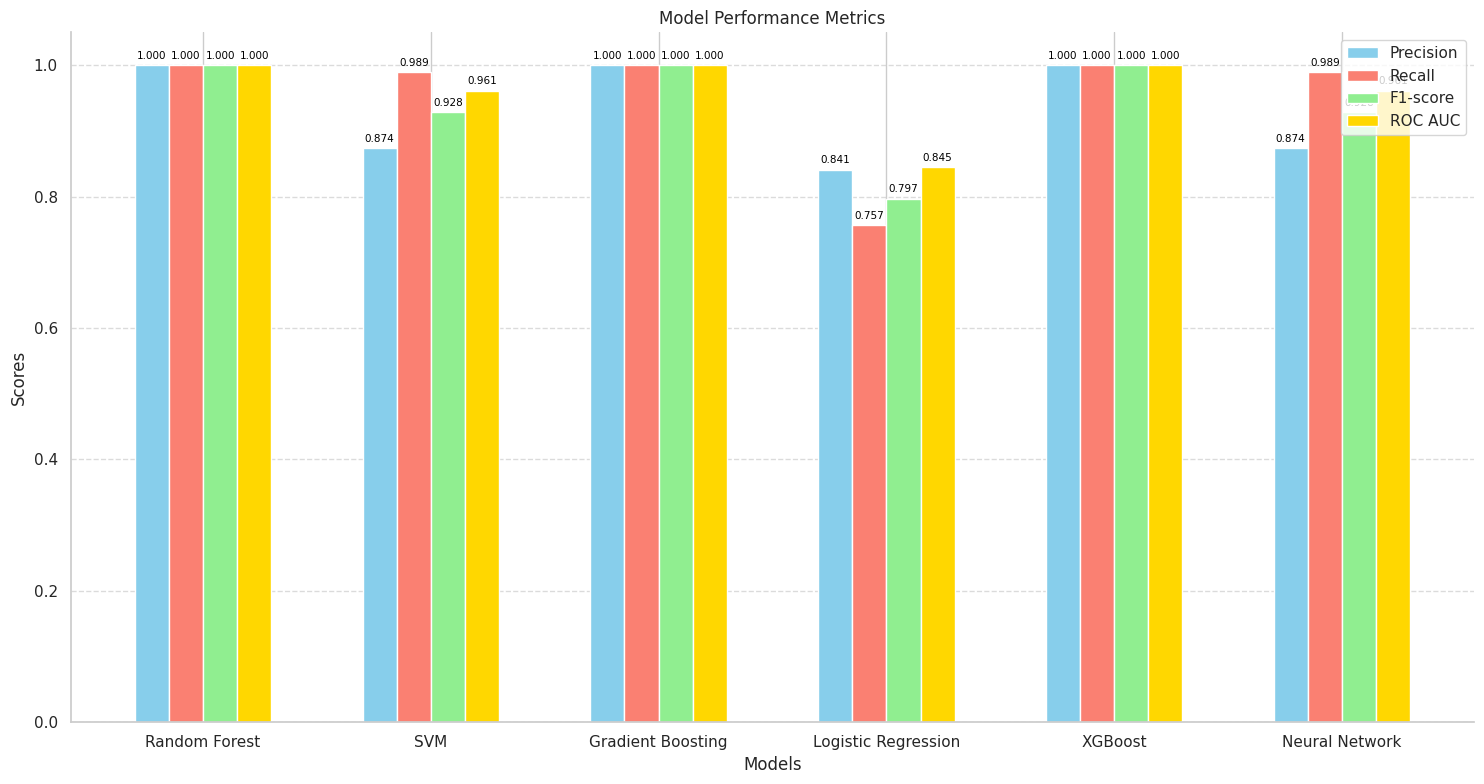

In [15]:
#Detayli karsilastirmanin gorseli icin

# Extract model names and metrics
model_names = list(results.keys())
metrics = list(results[model_names[0]].keys())

# Arrange the data for plotting
metric_values = {metric: [results[model][metric] for model in model_names] for metric in metrics}
x = np.arange(len(model_names))
bar_width = 0.15  # Width of the bars
colors = ['skyblue', 'salmon', 'lightgreen', 'gold']  # Colors for different metrics

# Plot grouped bars for each metric
fig, ax = plt.subplots(figsize=(15, 8))

for i, (metric, color) in enumerate(zip(metrics, colors)):
    ax.bar(x + (i - 1.5) * bar_width, metric_values[metric], width=bar_width, label=metric, color=color)

# Annotations and labels
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend(loc='upper right')

# Adding gridlines and removing spines
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adding data labels on top of bars
for i, metric in enumerate(metrics):
    for j, val in enumerate(metric_values[metric]):
        ax.text(j + (i - 1.5) * bar_width, val + 0.01, f'{val:.3f}', ha='center', color='black', fontsize=7.5)

plt.tight_layout()

# Save the plot
output_path = '/kaggle/working/model_performance_metrics2.png'
plt.savefig(output_path, bbox_inches='tight')

plt.show()


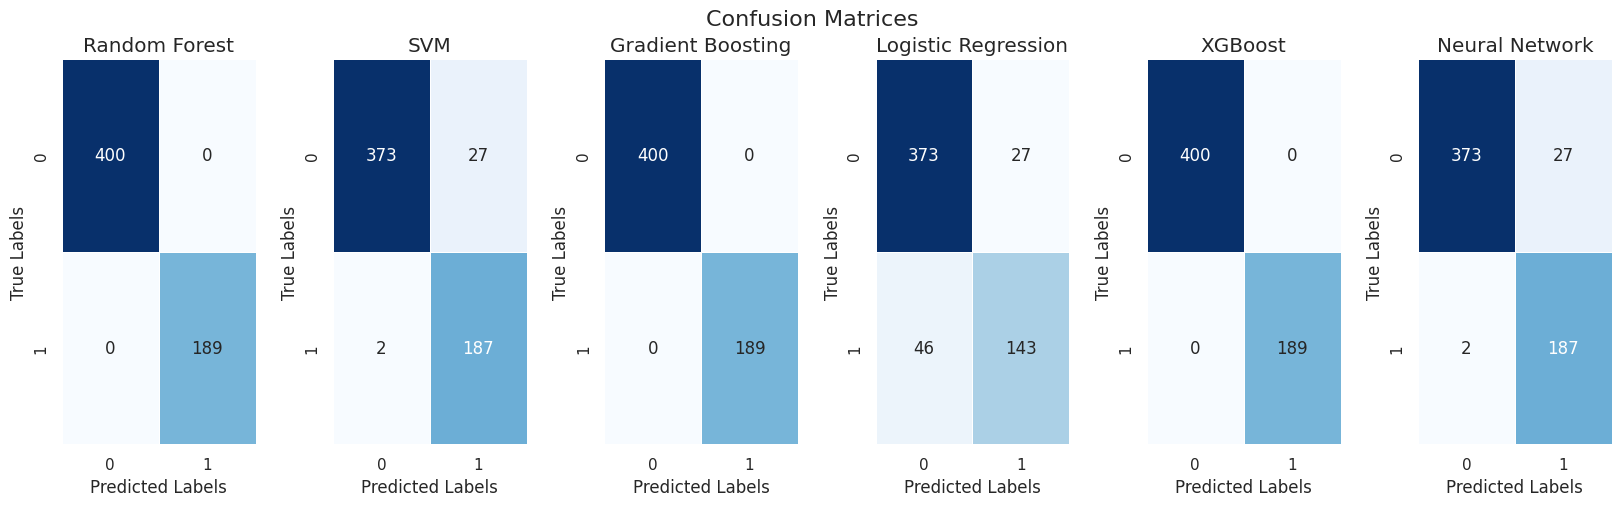

In [16]:
def plot_conf_matrix(y_test, rf_predictions, svm_predictions, gb_predictions, lr_predictions,xgboost_predictions,nn_predictions):
    #Modeller tahminlerinde ne kadar hatali tahmin yaptilar gorseli. Confussion Matric
    
    # Create confusion matrices for each model
    rf_confusion = confusion_matrix(y_test, rf_predictions)
    svm_confusion = confusion_matrix(y_test, svm_predictions)
    gb_confusion = confusion_matrix(y_test, gb_predictions)
    lr_confusion = confusion_matrix(y_test, lr_predictions)
    xgboost_confusion = confusion_matrix(y_test, xgboost_predictions)
    nn_confusion = confusion_matrix(y_test, nn_predictions)

    # Create subplots for the confusion matrices
    fig, axs = plt.subplots(1, 6, figsize=(20, 5))
    fig.suptitle('Confusion Matrices', fontsize=16)

    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    # Plot Random Forest Confusion Matrix
    sns.set(font_scale=1.2)
    sns.heatmap(rf_confusion, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12}, linewidths=0.5, ax=axs[0])
    axs[0].set_title("Random Forest")
    axs[0].set_xlabel('Predicted Labels')
    axs[0].set_ylabel('True Labels')

    # Plot SVM Confusion Matrix
    sns.set(font_scale=1.2)
    sns.heatmap(svm_confusion, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12}, linewidths=0.5, ax=axs[1])
    axs[1].set_title("SVM")
    axs[1].set_xlabel('Predicted Labels')
    axs[1].set_ylabel('True Labels')

    # Plot Gradient Boosting Confusion Matrix
    sns.set(font_scale=1.2)
    sns.heatmap(gb_confusion, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12}, linewidths=0.5, ax=axs[2])
    axs[2].set_title("Gradient Boosting")
    axs[2].set_xlabel('Predicted Labels')
    axs[2].set_ylabel('True Labels')

    # Plot Logistic Regression Confusion Matrix
    sns.set(font_scale=1.2)
    sns.heatmap(lr_confusion, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12}, linewidths=0.5, ax=axs[3])
    axs[3].set_title("Logistic Regression")
    axs[3].set_xlabel('Predicted Labels')
    axs[3].set_ylabel('True Labels')
    
    # Plot Neural Network Confusion Matrix
    sns.set(font_scale=1.2)
    sns.heatmap(xgboost_confusion, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12}, linewidths=0.5, ax=axs[4])
    axs[4].set_title("XGBoost")
    axs[4].set_xlabel('Predicted Labels')
    axs[4].set_ylabel('True Labels')

    # Plot Neural Network Confusion Matrix
    sns.set(font_scale=1.2)
    sns.heatmap(nn_confusion, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12}, linewidths=0.5, ax=axs[5])
    axs[5].set_title("Neural Network")
    axs[5].set_xlabel('Predicted Labels')
    axs[5].set_ylabel('True Labels')
    output_path = '/kaggle/working/confusion_matrices.png'
    plt.savefig(output_path, bbox_inches='tight')

    plt.show()

# Example usage
plot_conf_matrix(y_test, rf_predictions, svm_predictions, gb_predictions, lr_predictions,xgboost_predictions,nn_predictions)
